In [100]:
import dynamiqs as dq
import jax.numpy as jnp
import jax.scipy.linalg as jla
import matplotlib.pyplot as plt

In [101]:
N = 100
alpha = 2 + 2j
omega_r = 4
omega_q = 4
g = 1
psi_r = dq.coherent(N,alpha)
psi_q = dq.fock(2,0)
psi = dq.tensor(psi_r, psi_q)
rho_r = dq.todm(psi_r)
rho = dq.todm(psi)
a = dq.tensor(dq.destroy(N),dq.eye(2))
a_dag = dq.tensor(dq.create(N),dq.eye(2))
n = dq.tensor(dq.number(N),dq.eye(2))
b = dq.tensor(dq.eye(N),dq.sigmam())
b_dag = dq.tensor(dq.eye(N),dq.sigmap())

H_res = omega_r*n
H_qub = omega_q/2*dq.tensor(dq.eye(N),dq.sigmaz())
H_int = g*(a@b_dag + a_dag@b)
H_idle = H_res + H_qub + H_int

kappa = 0
collapse = jnp.sqrt(kappa)*a

times = jnp.linspace(0,10,1000)

In [103]:
me_res = dq.mesolve(H_idle,[collapse],rho,times,exp_ops=[n,a,H_qub])

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 6.35s ◆ remaining 0.00ms  


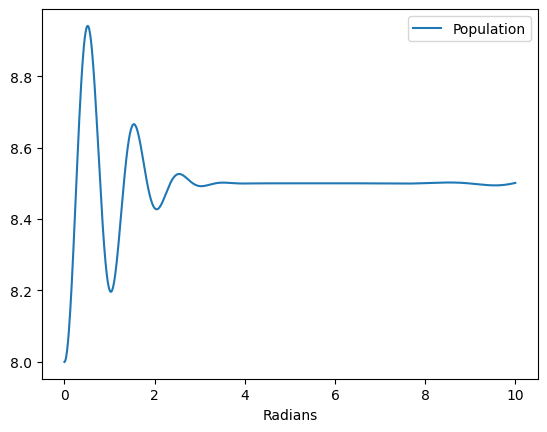

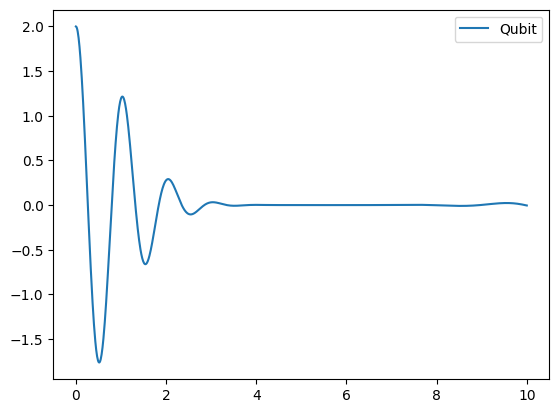

In [106]:
alpha_t = me_res.expects[1]
n_t = me_res.expects[0]
q_t = me_res.expects[2]
rho_t = me_res.states
rho_r_t = dq.ptrace(rho_t,0,(N,2))
plt.plot(times,jnp.real(n_t),label="Population")
plt.legend()
plt.xlabel("Radians")
plt.show()
plt.plot(times,jnp.real(q_t),label="Qubit")
plt.legend()
plt.show()

100%|██████████| 250/250 [00:24<00:00, 10.15it/s]


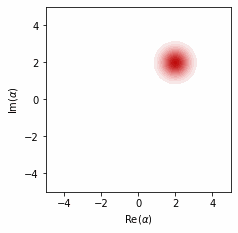

In [107]:
dq.plot_wigner_gif(
  states=rho_r_t,
  gif_duration=10,
  fps=25,
  npixels=200,
  filename="jc_wigner.gif")